***
# 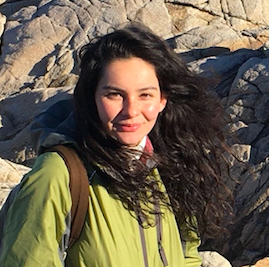  **ANNA TORRES**
*** 
Undergraduate psychology student at Dalhousie University with introductory python skills. I have completed Intro to Python (CSCI1105) and am currently enrolled in Neural Data Science (PSYO3505).
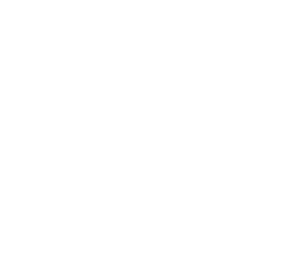

###### Python skills:
- For and while loops
- Dataframe manipulation
- Visualizations with Seaborn

****

##### Preliminary code:

In [46]:
#package loading and reading in data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv('avocado 2.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## **Loops!**

This video demo shows an understanding of underlying mechanisms of loops, as well as how to construct them.

*https://web.microsoftstream.com/video/a9e4a344-516c-4c1a-9488-cd2fcd2defd2*


Additionally, one is able to loop through DataFrames with the **itterows** function. In pandas, one must explicitly mention iterating over rows:

In [50]:
frame = pd.DataFrame({'num_limbs': [8, 2], 'num_eyes': [8, 2]}, index=['spider', 'human'])

for a, row in frame.iterrows():
    print(a)
    print(row)

spider
num_limbs    8
num_eyes     8
Name: spider, dtype: int64
human
num_limbs    2
num_eyes     2
Name: human, dtype: int64


## **DataFrame Manipulations:**

*What regions purchase the most avocados by volume?*

In [80]:
#Grouping sum of total volume by location and sorting in descending order

df2 = df.copy()
avg_price = np.array(df2.AveragePrice)


df2 = df2.loc[:, ['Total Volume', 'region']].groupby(['region']).sum().sort_values('Total Volume', ascending = False)
df2 = df2.drop('TotalUS')
print(df2.head())

volumes = []
for a, row in df2.iterrows():
    volumes.append(row)
print('The highest volume consumed was', row[0], 'units')


              Total Volume
region                    
West          1.086779e+09
California    1.028982e+09
SouthCentral  1.011280e+09
Northeast     7.132809e+08
Southeast     6.152384e+08
The highest volume consumed was 10942667.680000002 units


*How do the average, min, and max prices compare between different regions and years?*

In [27]:
# sorting data by region and year. Creating columns for the mean price, total bag, volumn
df_sorted = df.groupby(['region', 'year']).agg(
avg_price=('AveragePrice','mean'),
min_price = ('AveragePrice', 'min'),
max_price = ('AveragePrice', 'max'),
mean_total_bag = ('Total Bags', 'mean')
).round(2)


df_sorted

avg_price  min_price  max_price  mean_total_bag
region           year                                                 
Albany           2015       1.54       0.93       2.09         6919.77
                 2016       1.53       0.85       2.00         8060.58
                 2017       1.64       1.13       2.13         7882.13
                 2018       1.44       1.03       1.71        11949.73
Atlanta          2015       1.38       0.93       2.04        28817.22
...                          ...        ...        ...             ...
West             2018       1.30       0.83       1.83      1585553.88
WestTexNewMexico 2015       1.26       0.68       2.19        53670.68
                 2016       1.25       0.68       2.93       108410.93
                 2017       1.28       0.52       2.50       142280.61
                 2018       1.25       0.75       1.93       154021.43

[216 rows x 4 columns]

## **Visualizations with Seaborn:**

([<matplotlib.axis.XTick at 0x7f6cc92ca520>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

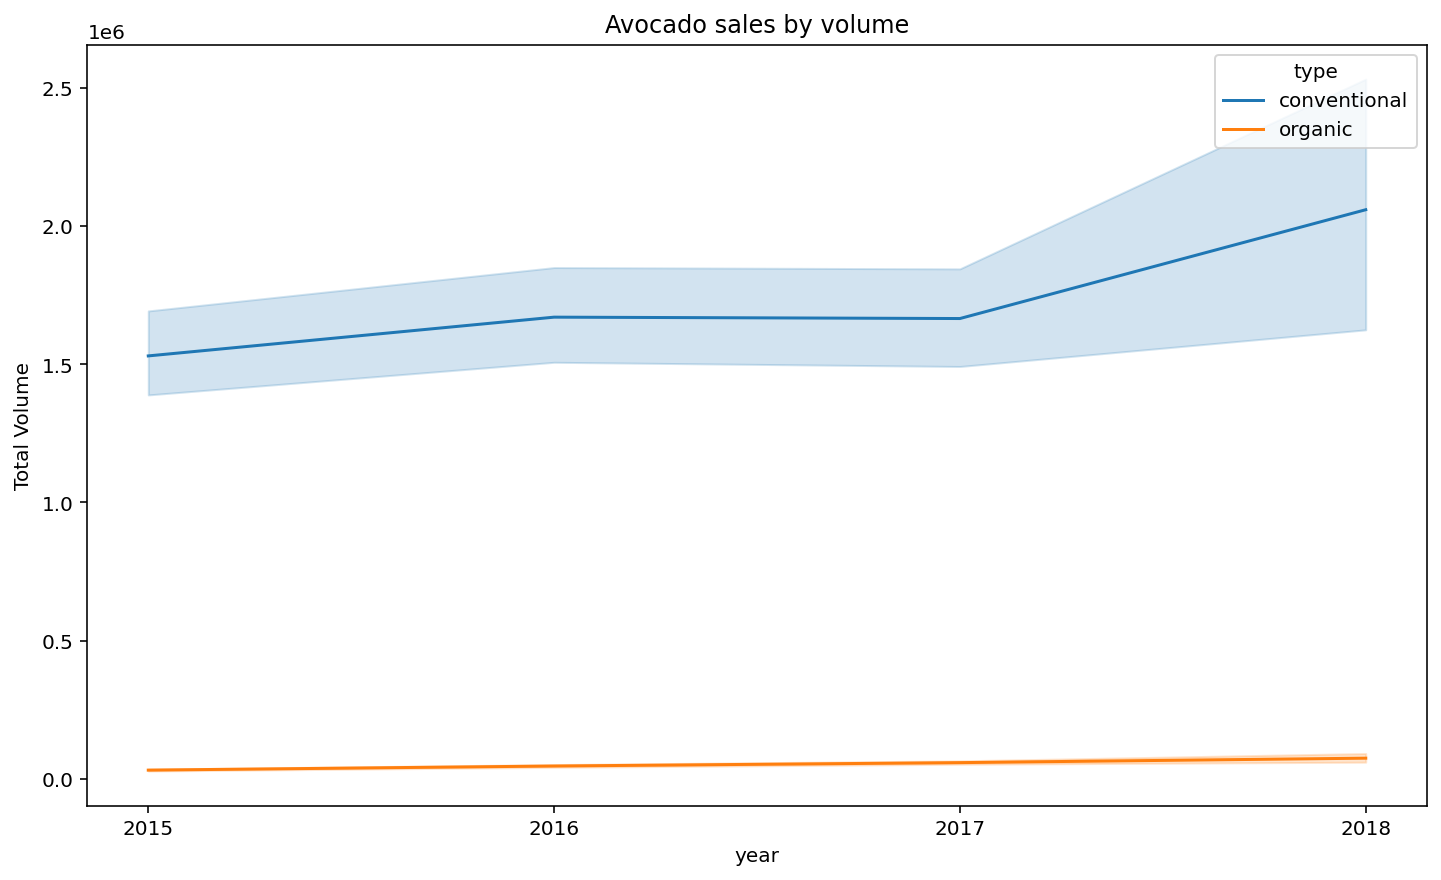

In [34]:
#linegraph to inspect how price for avocado types has varied over the years

sns.lineplot(x= "year", y = 'Total Volume', data = df, hue = 'type')
plt.title('Avocado sales by volume')
plt.xticks([2015, 2016, 2017, 2018])

Text(0.5, 1.0, 'Avocado Prices')

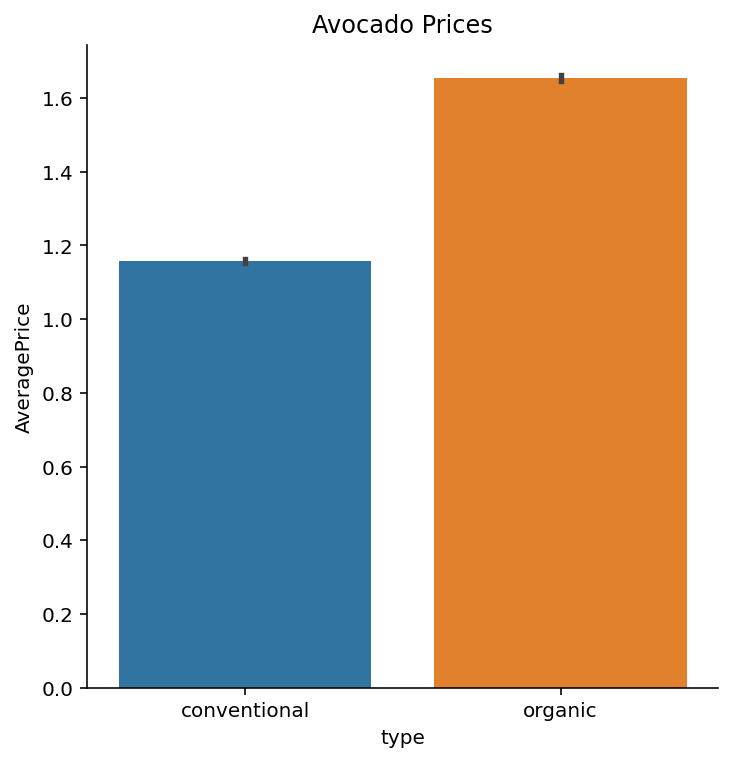

In [3]:
#bar graph to show how avocado price has varied over the years
sns.catplot(kind ='bar', x = 'type', y = 'AveragePrice', data = df)
plt.title('Avocado Prices')